## Bitcoin LSTM Model with Tweet Volume and Sentiment

In [1]:
import pandas as pd
import re 
from matplotlib import pyplot
import seaborn as sns

import numpy as np
import os # accessing directory structure

from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

#set seed
np.random.seed(12345)

# Data Pre-processing

In [3]:
notclean = pd.read_csv('/content/drive/MyDrive/Datasets/cleanprep.csv', delimiter=',', error_bad_lines=False,engine = 'python',header = None)

In [4]:
notclean.head()

,0,1,2,3,4
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000


In [5]:
notclean.shape


(1413001, 5)

In [6]:
#-----------------Pre-processing -------------------#

notclean.columns =['dt', 'name','text','polarity','sensitivity']
notclean.head()


,dt,name,text,polarity,sensitivity
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000


In [7]:
notclean =notclean.drop(['name','text'], axis=1)
notclean.head()

,dt,polarity,sensitivity
0,2018-07-11 19:35:15.363270,0.007273,0.590909
1,2018-07-11 19:35:15.736769,0.000000,0.000000
2,2018-07-11 19:35:15.744769,0.625000,0.500000
3,2018-07-11 19:35:15.867339,0.000000,0.175000
4,2018-07-11 19:35:16.021448,0.333333,0.500000


In [8]:
notclean.info()
notclean['dt'] = pd.to_datetime(notclean['dt'])
notclean['DateTime'] = notclean['dt'].dt.floor('h')
notclean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413001 entries, 0 to 1413000
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   dt           1413001 non-null  object 
 1   polarity     1413001 non-null  float64
 2   sensitivity  1413001 non-null  float64
dtypes: float64(2), object(1)
memory usage: 32.3+ MB


,dt,polarity,sensitivity,DateTime
0,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
2,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
3,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
4,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [9]:
vdf = notclean.groupby(pd.Grouper(key='dt',freq='H')).size().reset_index(name='tweet_vol')
vdf.head()


,dt,tweet_vol
0,2018-07-11 19:00:00,1747
1,2018-07-11 20:00:00,4354
2,2018-07-11 21:00:00,4432
3,2018-07-11 22:00:00,3980
4,2018-07-11 23:00:00,3830


In [10]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         302 non-null    datetime64[ns]
 1   tweet_vol  302 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.8 KB


In [11]:
vdf.index = pd.to_datetime(vdf.index)
vdf = vdf.set_index('dt')
 

In [12]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2018-07-11 19:00:00 to 2018-07-24 08:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_vol  302 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [13]:
vdf.head()

,tweet_vol
dt,
2018-07-11 19:00:00,1747
2018-07-11 20:00:00,4354
2018-07-11 21:00:00,4432
2018-07-11 22:00:00,3980
2018-07-11 23:00:00,3830


In [14]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413001 entries, 0 to 1413000
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   dt           1413001 non-null  datetime64[ns]
 1   polarity     1413001 non-null  float64       
 2   sensitivity  1413001 non-null  float64       
 3   DateTime     1413001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 43.1 MB


In [15]:
notclean.index = pd.to_datetime(notclean.index)
notclean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413001 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.001413
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   dt           1413001 non-null  datetime64[ns]
 1   polarity     1413001 non-null  float64       
 2   sensitivity  1413001 non-null  float64       
 3   DateTime     1413001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 53.9 MB


In [16]:
vdf['tweet_vol'] =vdf['tweet_vol'].astype(float)

In [17]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2018-07-11 19:00:00 to 2018-07-24 08:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_vol  302 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [18]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413001 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.001413
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   dt           1413001 non-null  datetime64[ns]
 1   polarity     1413001 non-null  float64       
 2   sensitivity  1413001 non-null  float64       
 3   DateTime     1413001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 53.9 MB


In [19]:
notclean.head()

,dt,polarity,sensitivity,DateTime
1970-01-01 00:00:00.000000000,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1970-01-01 00:00:00.000000001,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000002,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000003,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000004,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [20]:
df = notclean.groupby('DateTime').agg(lambda x: x.mean())

In [21]:
df['Tweet_vol'] = vdf['tweet_vol']

In [22]:
df = df.drop(df.index[0])

In [23]:
df.head()

,dt,polarity,sensitivity,Tweet_vol
DateTime,,,,
2018-07-11 20:00:00,2018-07-11 20:27:49.510634240,0.102657,0.216148,4354.0
2018-07-11 21:00:00,2018-07-11 21:28:35.636373760,0.098004,0.218612,4432.0
2018-07-11 22:00:00,2018-07-11 22:27:44.646708224,0.096688,0.231342,3980.0
2018-07-11 23:00:00,2018-07-11 23:28:06.455845632,0.103997,0.217739,3830.0
2018-07-12 00:00:00,2018-07-12 00:28:47.975380992,0.094383,0.195256,3998.0


In [24]:
df.tail()

,dt,polarity,sensitivity,Tweet_vol
DateTime,,,,
2018-07-24 04:00:00,2018-07-24 04:27:40.946246144,0.121358,0.236000,4475.0
2018-07-24 05:00:00,2018-07-24 05:28:40.424965632,0.095163,0.216924,4808.0
2018-07-24 06:00:00,2018-07-24 06:30:52.606722816,0.088992,0.220173,6036.0
2018-07-24 07:00:00,2018-07-24 07:27:29.229672704,0.091439,0.198279,6047.0
2018-07-24 08:00:00,2018-07-24 08:07:02.674451968,0.071268,0.218217,2444.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301 entries, 2018-07-11 20:00:00 to 2018-07-24 08:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dt           301 non-null    datetime64[ns]
 1   polarity     301 non-null    float64       
 2   sensitivity  301 non-null    float64       
 3   Tweet_vol    301 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.8 KB


In [26]:
train= pd.read_csv('/content/drive/MyDrive/Datasets/cleanprep.csv',nrows=20000)
train.shape

(20000, 5)

In [27]:
train.columns=['date','name','text','sentiment','polarity']
train=train.drop(['date','name','polarity'],axis=1)
train.head()

,text,sentiment
0,b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000
1,b'Duplicate skilled traders automatically with...,0.625000
2,b'Project Manager - Technical - FinTech - Cent...,0.000000
3,"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333
4,"b'If you don\xe2\x80\x99t understand Bitcoin, ...",0.000000


In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#lets save stopwords in a variable
stop = list(stopwords.words("english"))
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [29]:
import string

# save list of punctuation/special characters in a variable
punctuation = list(string.punctuation)
print(punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [30]:
from nltk.stem import WordNetLemmatizer
# create an object to convert the words to its lemma form
lemma = WordNetLemmatizer()

In [31]:
# lets make a combine list of stopwords and punctuations
sw_pun = stop + punctuation

In [32]:
# function to preprocess the messages
def preprocess(tweet):
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet) # removing urls 
    tweet = re.sub('[^\w]',' ',tweet) # remove embedded special characters in words (for example #earthquake)         
    #tweet = re.sub('[\d]','',tweet) # this will remove numeric characters
    tweet = tweet.lower()
    words = tweet.split()  
    sentence = ""
    for word in words:     
        if word not in (sw_pun):  # removing stopwords & punctuations                
            word = lemma.lemmatize(word,pos = 'v')  # converting to lemma    
            if len(word) > 3: # we will consider words with length  greater than 3 only
                sentence = sentence + word + ' '             
    return(sentence)

In [33]:
nltk.download('wordnet')
# apply preprocessing functions on the train and test datasets
train['text'] = train['text'].apply(lambda s : preprocess(s))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
# function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [35]:
# applying the function on the train and the test datasets
train['text'] = train['text'].apply(lambda s : remove_emoji(s))

#Vocabulary Creation

In [36]:
# function to create vocab
from collections import Counter
def create_vocab(df):
    vocab = Counter()
    for i in range(df.shape[0]):
        vocab.update(df.text[i].split())
    return(vocab)

In [37]:
# concatenate training and testing datasets
master=train.reset_index(drop=True)

# call vocabulary creation function on master dataset
vocab = create_vocab(master)

# lets check the no. of words in the vocabulary
len(vocab)

19951

In [38]:
# lets check the most common 50 words in the vocabulary
vocab.most_common(50)

[('bitcoin', 10895),
 ('crypto', 3131),
 ('price', 2043),
 ('blockchain', 1707),
 ('cryptocurrency', 1464),
 ('ethereum', 1277),
 ('exchange', 899),
 ('copy', 842),
 ('traders', 728),
 ('automatically', 686),
 ('wangzai888', 682),
 ('trade', 678),
 ('market', 582),
 ('2018', 577),
 ('airdrop', 531),
 ('money', 515),
 ('x99s', 507),
 ('cash', 485),
 ('news', 469),
 ('nbtc', 450),
 ('project', 434),
 ('sell', 430),
 ('ripple', 426),
 ('free', 424),
 ('current', 420),
 ('make', 417),
 ('litecoin', 413),
 ('binance', 393),
 ('leverage', 368),
 ('bitmex', 368),
 ('coin', 359),
 ('india', 338),
 ('know', 337),
 ('time', 335),
 ('100x', 328),
 ('neth', 325),
 ('look', 323),
 ('live', 318),
 ('best', 314),
 ('mine', 314),
 ('covesting', 313),
 ('hackney', 306),
 ('blackpool', 305),
 ('kent', 305),
 ('solihul', 305),
 ('southall', 305),
 ('scotland', 305),
 ('nottinghill', 305),
 ('delhi', 305),
 ('britainfirst', 305)]

In [39]:
# create the final vocab by considering words with more than one occurence
final_vocab = []
min_occur = 2
for k,v in vocab.items():
    if v >= min_occur:
        final_vocab.append(k)

In [40]:
# lets check the no. of the words in the final vocabulary
vocab_size = len(final_vocab)
vocab_size

7854

In [41]:
# function to filter the dataset, keep only words which are present in the vocab
def filter(tweet):
    sentence = ""
    for word in tweet.split():  
        if word in final_vocab:
            sentence = sentence + word + ' '
    return(sentence)

In [42]:
# apply filter function on the train and test datasets
train['text'] = train['text'].apply(lambda s : filter(s))
train.sample(10)

,text,sentiment
2923,money historical approach bitcoin money japan,0.000000
19309,iran could become first country force bitcoin ...,-0.025000
3721,latest episode live cboe bitcoin decision date...,0.335227
10774,bitcoin bitcoincash transaction bitcoin bitcoi...,0.000000
2031,criptodolar crypto trade 2018 dash,0.000000
10895,xa5711 mini lisk,0.000000
3576,well,0.000000
14079,,0.000000
14488,btcp btcp fork trade invest privacy,0.000000
7058,mb8coin read understand project believe mb8coi...,0.750000


In [43]:
btcDF = pd.read_csv('/content/drive/MyDrive/Datasets/btcSave2.csv', error_bad_lines=False,engine = 'python')

In [44]:
btcDF['Timestamp'] = pd.to_datetime(btcDF['Timestamp'])
btcDF = btcDF.set_index(pd.DatetimeIndex(btcDF['Timestamp']))

In [45]:
btcDF.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,,
2018-07-10 01:00:00,2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32


In [46]:
btcDF = btcDF.drop(['Timestamp'], axis=1)

In [47]:
btcDF.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32


In [48]:
Final_df = pd.merge(df,btcDF, how='inner',left_index=True, right_index=True)

In [49]:
Final_df.to_csv(r'/content/drive/MyDrive/Datasets/Final.csv')

In [50]:
Final_df.head()

,dt,polarity,sensitivity,Tweet_vol,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
2018-07-11 20:00:00,2018-07-11 20:27:49.510634240,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,6350.00,986.73,6231532.37,6315.33
2018-07-11 21:00:00,2018-07-11 21:28:35.636373760,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,6356.48,126.46,804221.55,6359.53
2018-07-11 22:00:00,2018-07-11 22:27:44.646708224,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,6361.93,259.10,1646353.87,6354.12
2018-07-11 23:00:00,2018-07-11 23:28:06.455845632,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,6368.78,81.54,519278.69,6368.23
2018-07-12 00:00:00,2018-07-12 00:28:47.975380992,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,6380.00,124.55,793560.22,6371.51


In [51]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-07-11 20:00:00 to 2018-07-24 01:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dt                 294 non-null    datetime64[ns]
 1   polarity           294 non-null    float64       
 2   sensitivity        294 non-null    float64       
 3   Tweet_vol          294 non-null    float64       
 4   Open               294 non-null    float64       
 5   High               294 non-null    float64       
 6   Low                294 non-null    float64       
 7   Close              294 non-null    float64       
 8   Volume (BTC)       294 non-null    float64       
 9   Volume (Currency)  294 non-null    float64       
 10  Weighted Price     294 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 27.6 KB


In [52]:
Final_df=Final_df.drop(['Weighted Price'],axis=1 )


In [53]:
Final_df.head()

,dt,polarity,sensitivity,Tweet_vol,Open,High,Low,Close,Volume (BTC),Volume (Currency)
2018-07-11 20:00:00,2018-07-11 20:27:49.510634240,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,6350.00,986.73,6231532.37
2018-07-11 21:00:00,2018-07-11 21:28:35.636373760,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,6356.48,126.46,804221.55
2018-07-11 22:00:00,2018-07-11 22:27:44.646708224,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,6361.93,259.10,1646353.87
2018-07-11 23:00:00,2018-07-11 23:28:06.455845632,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,6368.78,81.54,519278.69
2018-07-12 00:00:00,2018-07-12 00:28:47.975380992,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,6380.00,124.55,793560.22


In [54]:
Final_df.columns = ['','Polarity', 'Sensitivity','Tweet_vol','Open','High','Low', 'Close_Price', 'Volume_BTC', 'Volume_Dollar']

In [55]:
Final_df.head()

,,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Close_Price,Volume_BTC,Volume_Dollar
2018-07-11 20:00:00,2018-07-11 20:27:49.510634240,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,6350.00,986.73,6231532.37
2018-07-11 21:00:00,2018-07-11 21:28:35.636373760,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,6356.48,126.46,804221.55
2018-07-11 22:00:00,2018-07-11 22:27:44.646708224,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,6361.93,259.10,1646353.87
2018-07-11 23:00:00,2018-07-11 23:28:06.455845632,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,6368.78,81.54,519278.69
2018-07-12 00:00:00,2018-07-12 00:28:47.975380992,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,6380.00,124.55,793560.22


In [56]:
Final_df = Final_df[['Polarity', 'Sensitivity','Tweet_vol', 'Open','High','Low', 'Volume_BTC', 'Volume_Dollar', 'Close_Price']]

In [57]:
Final_df

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,986.73,6231532.37,6350.00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,126.46,804221.55,6356.48
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,259.10,1646353.87,6361.93
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,81.54,519278.69,6368.78
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,124.55,793560.22,6380.00
...,...,...,...,...,...,...,...,...,...
2018-07-23 21:00:00,0.107282,0.235636,5164.0,7746.99,7763.59,7690.16,237.63,1836633.86,7706.00
2018-07-23 22:00:00,0.094493,0.271796,4646.0,7699.13,7759.99,7690.50,63.31,489000.25,7750.09
2018-07-23 23:00:00,0.074246,0.231640,4455.0,7754.57,7777.00,7715.45,280.46,2173424.81,7722.32
2018-07-24 00:00:00,0.080870,0.219367,3862.0,7722.95,7730.61,7690.17,496.48,3830571.66,7719.62


In [58]:
#---------------Stage 1 Complete ------------------#
#Final_df.to_csv('Desktop/Sentiment.csv')

# Exploratory Analysis

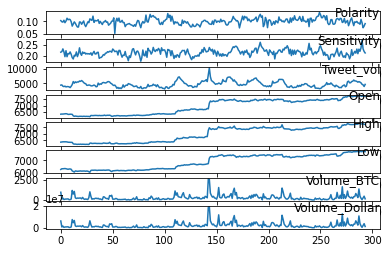

In [59]:
#--------------Analysis----------------------------#

values = Final_df.values
groups = [0,1,2,3,4,5,6,7]
i =1  
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(Final_df.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [60]:
Final_df['Volume_BTC'].max()


2640.49

In [61]:
Final_df['Volume_Dollar'].max()

19126407.89

In [62]:
Final_df['Volume_BTC'].sum()

96945.04000000001

In [63]:
Final_df['Volume_Dollar'].sum()

684457140.05

In [64]:
Final_df['Tweet_vol'].max()

10452.0

In [65]:
Final_df.describe()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,2.940000e+02,294.000000
mean,0.099534,0.214141,4691.119048,6915.349388,6946.782925,6889.661054,329.745034,2.328086e+06,6920.150000
std,0.012114,0.014940,1048.922706,564.467674,573.078843,559.037540,344.527625,2.508128e+06,565.424866
min,0.051695,0.174330,2998.000000,6149.110000,6173.610000,6072.000000,22.000000,1.379601e+05,6149.110000
25%,0.091489,0.203450,3878.750000,6285.077500,6334.942500,6266.522500,129.230000,8.412214e+05,6283.497500
50%,0.099198,0.214756,4452.000000,7276.845000,7311.380000,7245.580000,223.870000,1.607008e+06,7281.975000
75%,0.106649,0.223910,5429.750000,7422.957500,7457.202500,7396.427500,385.135000,2.662185e+06,7424.560000
max,0.135088,0.271796,10452.000000,7754.570000,7800.000000,7724.500000,2640.490000,1.912641e+07,7750.090000


In [66]:
cor = Final_df.corr()
cor

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
Polarity,1.000000,0.380350,-0.167573,0.179056,0.176277,0.180088,-0.062868,-0.052646,0.178456
Sensitivity,0.380350,1.000000,0.053903,0.194763,0.200611,0.190222,0.097124,0.112425,0.193203
Tweet_vol,-0.167573,0.053903,1.000000,0.237185,0.262207,0.234330,0.541112,0.545850,0.250448
Open,0.179056,0.194763,0.237185,1.000000,0.997128,0.998799,0.217478,0.277600,0.997217
High,0.176277,0.200611,0.262207,0.997128,1.000000,0.996650,0.270551,0.329816,0.998816
Low,0.180088,0.190222,0.234330,0.998799,0.996650,1.000000,0.202895,0.263863,0.998058
Volume_BTC,-0.062868,0.097124,0.541112,0.217478,0.270551,0.202895,1.000000,0.995873,0.243875
Volume_Dollar,-0.052646,0.112425,0.545850,0.277600,0.329816,0.263863,0.995873,1.000000,0.303347
Close_Price,0.178456,0.193203,0.250448,0.997217,0.998816,0.998058,0.243875,0.303347,1.000000


In [67]:
Top_Vol =Final_df['Volume_BTC'].nlargest(10)
Top_Vol

2018-07-17 18:00:00    2640.49
2018-07-17 19:00:00    2600.32
2018-07-23 03:00:00    1669.28
2018-07-18 04:00:00    1576.15
2018-07-20 17:00:00    1510.00
2018-07-18 19:00:00    1490.02
2018-07-23 19:00:00    1396.32
2018-07-12 07:00:00    1211.64
2018-07-16 10:00:00    1147.69
2018-07-23 08:00:00    1135.38
Name: Volume_BTC, dtype: float64

In [68]:
Top_Sen =Final_df['Sensitivity'].nlargest(10)
Top_Sen

2018-07-23 22:00:00    0.271796
2018-07-19 20:00:00    0.262048
2018-07-21 19:00:00    0.256952
2018-07-20 22:00:00    0.246046
2018-07-22 06:00:00    0.245820
2018-07-19 19:00:00    0.244655
2018-07-19 21:00:00    0.244215
2018-07-18 20:00:00    0.243534
2018-07-18 21:00:00    0.243422
2018-07-18 18:00:00    0.241287
Name: Sensitivity, dtype: float64

In [69]:
Top_Pol =Final_df['Polarity'].nlargest(10)
Top_Pol

2018-07-22 05:00:00    0.135088
2018-07-16 03:00:00    0.130634
2018-07-19 20:00:00    0.127696
2018-07-15 10:00:00    0.127469
2018-07-22 06:00:00    0.126299
2018-07-15 06:00:00    0.124505
2018-07-16 05:00:00    0.124210
2018-07-22 09:00:00    0.122784
2018-07-15 13:00:00    0.122411
2018-07-22 12:00:00    0.122021
Name: Polarity, dtype: float64

In [70]:
Top_Tweet =Final_df['Tweet_vol'].nlargest(10)
Top_Tweet

2018-07-17 19:00:00    10452.0
2018-07-17 18:00:00     7995.0
2018-07-17 20:00:00     7354.0
2018-07-16 14:00:00     7280.0
2018-07-18 15:00:00     7222.0
2018-07-18 14:00:00     7209.0
2018-07-18 13:00:00     7171.0
2018-07-16 13:00:00     7133.0
2018-07-19 16:00:00     6886.0
2018-07-18 12:00:00     6844.0
Name: Tweet_vol, dtype: float64

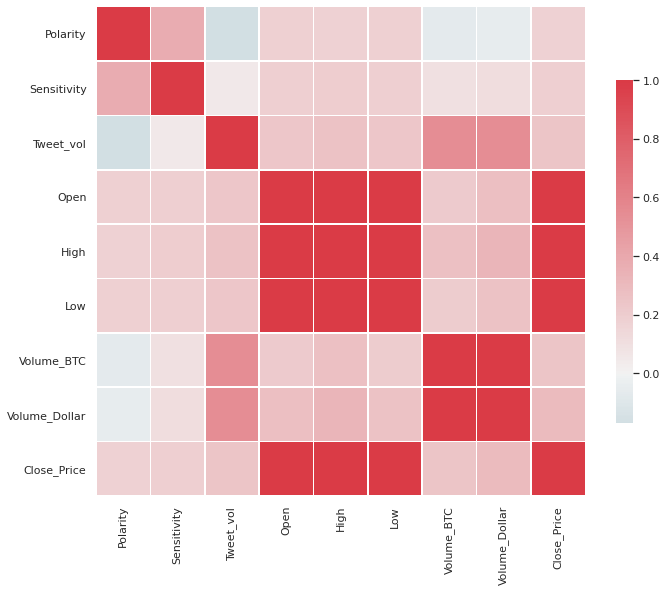

In [71]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

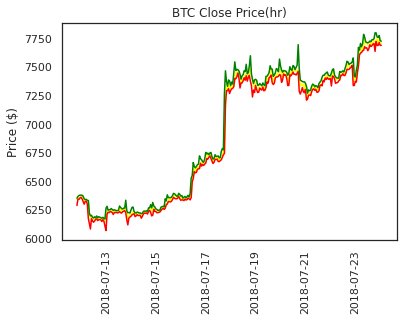

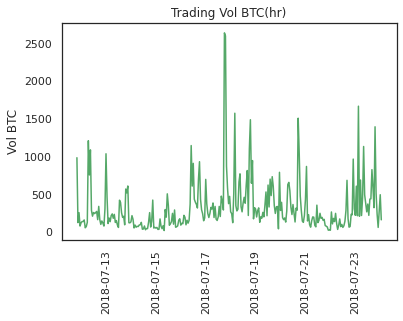

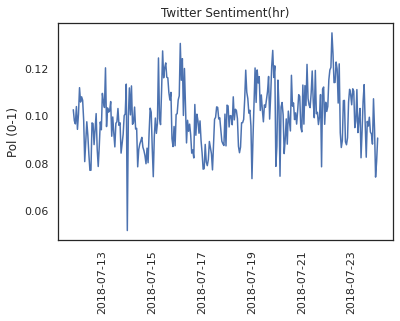

No handles with labels found to put in legend.


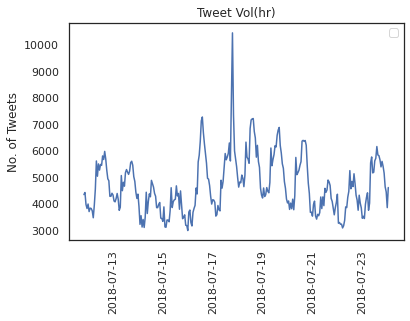

No handles with labels found to put in legend.


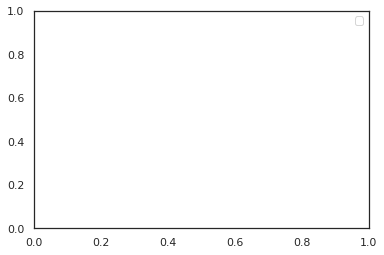

In [72]:
plt.plot(Final_df.index, Final_df['Open'], 'yellow')
plt.plot(Final_df.index, Final_df['Low'], 'red')
plt.plot(Final_df.index, Final_df['High'], 'green')
plt.title('BTC Close Price(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)');
plt.show();

plt.plot(Final_df.index, Final_df['Volume_BTC'], 'g')
plt.title('Trading Vol BTC(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Vol BTC');
plt.show();

plt.plot(Final_df.index, Final_df['Polarity'], 'b')
plt.xticks(rotation='vertical')
plt.title('Twitter Sentiment(hr)')
plt.ylabel('Pol (0-1)');
plt.show();
plt.legend()

plt.plot(Final_df.index, Final_df['Tweet_vol'], 'b')
plt.xticks(rotation='vertical')
plt.title('Tweet Vol(hr)')
plt.ylabel('No. of Tweets');
plt.show();
plt.legend()


In [73]:
#sns Heatmap for Hour x volume 
#Final_df['time']=Final_df.index.time()
Final_df['time']=Final_df.index.to_series().apply(lambda x: x.strftime("%X"))

In [74]:
Final_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price,time
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,986.73,6231532.37,6350.00,20:00:00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,126.46,804221.55,6356.48,21:00:00
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,259.10,1646353.87,6361.93,22:00:00
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,81.54,519278.69,6368.78,23:00:00
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,124.55,793560.22,6380.00,00:00:00


In [75]:
hour_df=Final_df

In [76]:
hour_df=hour_df.groupby('time').agg(lambda x: x.mean())
hour_df

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
time,,,,,,,,,
00:00:00,0.090298,0.211771,3976.384615,6930.237692,6958.360769,6900.588462,322.836154,2.228120e+06,6935.983077
01:00:00,0.099596,0.211714,4016.615385,6935.140769,6963.533846,6894.772308,318.415385,2.243338e+06,6933.794615
02:00:00,0.102724,0.204445,3824.083333,6868.211667,6889.440000,6842.588333,158.836667,1.105651e+06,6870.695833
03:00:00,0.105586,0.214824,3791.666667,6870.573333,6909.675833,6855.316667,328.811667,2.385733e+06,6888.139167
04:00:00,0.103095,0.208516,3822.916667,6887.420000,6911.649167,6872.603333,271.692500,1.949230e+06,6890.985000
05:00:00,0.108032,0.215058,3904.166667,6891.468333,6911.175833,6869.017500,213.315000,1.524601e+06,6890.451667
06:00:00,0.104412,0.210424,3760.250000,6889.327500,6907.070833,6868.484167,183.329167,1.281427e+06,6891.371667
07:00:00,0.100942,0.209435,4056.000000,6891.645833,6908.654167,6858.290833,329.882500,2.263694e+06,6878.757500
08:00:00,0.099380,0.210113,5095.583333,6878.635833,6903.660833,6851.435833,368.109167,2.616314e+06,6885.867500


In [77]:
hour_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
time,,,,,,,,,
00:00:00,0.090298,0.211771,3976.384615,6930.237692,6958.360769,6900.588462,322.836154,2.228120e+06,6935.983077
01:00:00,0.099596,0.211714,4016.615385,6935.140769,6963.533846,6894.772308,318.415385,2.243338e+06,6933.794615
02:00:00,0.102724,0.204445,3824.083333,6868.211667,6889.440000,6842.588333,158.836667,1.105651e+06,6870.695833
03:00:00,0.105586,0.214824,3791.666667,6870.573333,6909.675833,6855.316667,328.811667,2.385733e+06,6888.139167
04:00:00,0.103095,0.208516,3822.916667,6887.420000,6911.649167,6872.603333,271.692500,1.949230e+06,6890.985000


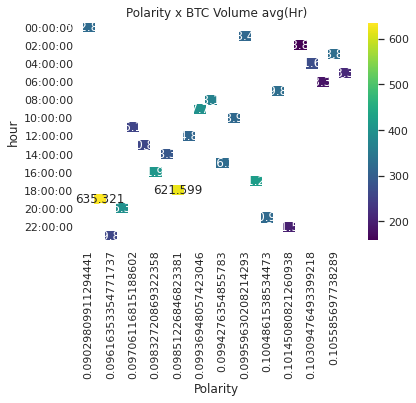

In [78]:
#sns Hourly Heatmap
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='hour', columns='Polarity', values='Volume_BTC')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('Polarity x BTC Volume avg(Hr)')
plt.show()

#sns daily heatmap?

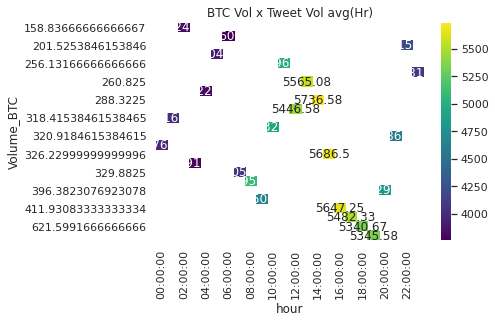

In [79]:
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='Volume_BTC', columns='hour', values='Tweet_vol')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('BTC Vol x Tweet Vol avg(Hr)')
plt.show()

In [80]:
cor = Final_df.corr()
cor


#----------------End Analysis------------------------#

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
Polarity,1.000000,0.380350,-0.167573,0.179056,0.176277,0.180088,-0.062868,-0.052646,0.178456
Sensitivity,0.380350,1.000000,0.053903,0.194763,0.200611,0.190222,0.097124,0.112425,0.193203
Tweet_vol,-0.167573,0.053903,1.000000,0.237185,0.262207,0.234330,0.541112,0.545850,0.250448
Open,0.179056,0.194763,0.237185,1.000000,0.997128,0.998799,0.217478,0.277600,0.997217
High,0.176277,0.200611,0.262207,0.997128,1.000000,0.996650,0.270551,0.329816,0.998816
Low,0.180088,0.190222,0.234330,0.998799,0.996650,1.000000,0.202895,0.263863,0.998058
Volume_BTC,-0.062868,0.097124,0.541112,0.217478,0.270551,0.202895,1.000000,0.995873,0.243875
Volume_Dollar,-0.052646,0.112425,0.545850,0.277600,0.329816,0.263863,0.995873,1.000000,0.303347
Close_Price,0.178456,0.193203,0.250448,0.997217,0.998816,0.998058,0.243875,0.303347,1.000000


**LSTM** **Preparation**

In [81]:
df = Final_df

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-07-11 20:00:00 to 2018-07-24 01:00:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       294 non-null    float64
 1   Sensitivity    294 non-null    float64
 2   Tweet_vol      294 non-null    float64
 3   Open           294 non-null    float64
 4   High           294 non-null    float64
 5   Low            294 non-null    float64
 6   Volume_BTC     294 non-null    float64
 7   Volume_Dollar  294 non-null    float64
 8   Close_Price    294 non-null    float64
 9   time           294 non-null    object 
dtypes: float64(9), object(1)
memory usage: 25.3+ KB


In [83]:
df = df.drop(['Open','High', 'Low', 'Volume_Dollar'], axis=1)
df.head()

,Polarity,Sensitivity,Tweet_vol,Volume_BTC,Close_Price,time
2018-07-11 20:00:00,0.102657,0.216148,4354.0,986.73,6350.00,20:00:00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,126.46,6356.48,21:00:00
2018-07-11 22:00:00,0.096688,0.231342,3980.0,259.10,6361.93,22:00:00
2018-07-11 23:00:00,0.103997,0.217739,3830.0,81.54,6368.78,23:00:00
2018-07-12 00:00:00,0.094383,0.195256,3998.0,124.55,6380.00,00:00:00


In [84]:
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC
2018-07-11 20:00:00,6350.00,0.102657,0.216148,4354.0,986.73
2018-07-11 21:00:00,6356.48,0.098004,0.218612,4432.0,126.46
2018-07-11 22:00:00,6361.93,0.096688,0.231342,3980.0,259.10
2018-07-11 23:00:00,6368.78,0.103997,0.217739,3830.0,81.54
2018-07-12 00:00:00,6380.00,0.094383,0.195256,3998.0,124.55


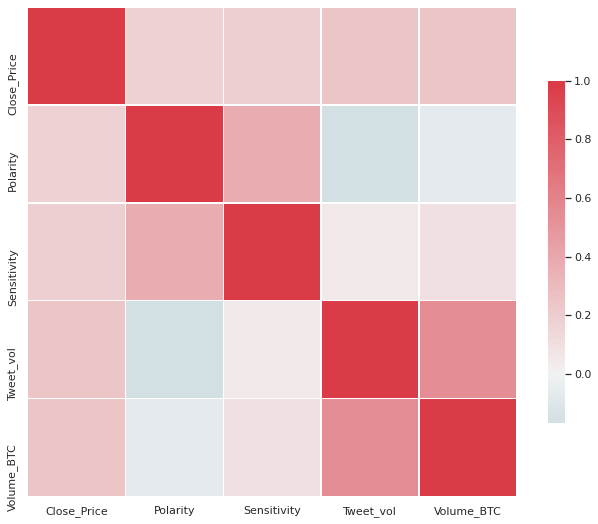

In [85]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

# LSTM Model

In [86]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [87]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC
2018-07-11 20:00:00,6350.00,0.102657,0.216148,4354.0,986.73
2018-07-11 21:00:00,6356.48,0.098004,0.218612,4432.0,126.46
2018-07-11 22:00:00,6361.93,0.096688,0.231342,3980.0,259.10
2018-07-11 23:00:00,6368.78,0.103997,0.217739,3830.0,81.54
2018-07-12 00:00:00,6380.00,0.094383,0.195256,3998.0,124.55


In [88]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)
n_hours = 3 #adding 3 hours lags creating number of observations 
n_features = 5 #Features in the dataset.
n_obs = n_hours*n_features

In [89]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.125479,0.611105,0.429055,0.181916,0.368430,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738
4,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164
5,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637
6,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561
7,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607


In [90]:
reframed.drop(reframed.columns[-4], axis=1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.125479,0.611105,0.429055,0.181916,0.368430,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738
4,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164
5,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637
6,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561
7,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607


In [91]:
print(reframed.head())

   var1(t-3)  var2(t-3)  var3(t-3)  ...   var3(t)   var4(t)   var5(t)
3   0.125479   0.611105   0.429055  ...  0.445375  0.111618  0.022738
4   0.129527   0.555312   0.454335  ...  0.214693  0.134156  0.039164
5   0.132931   0.539534   0.584943  ...  0.500135  0.095922  0.045637
6   0.137210   0.627175   0.445375  ...  0.212514  0.113362  0.045561
7   0.144218   0.511893   0.214693  ...  0.365349  0.111752  0.053607

[5 rows x 20 columns]


In [92]:
values = reframed.values
n_train_hours = 200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(200, 20)

In [93]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [94]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 3, 5) (200,) (91, 3, 5) (91,)


In [95]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=6, validation_data=(test_X, test_y), verbose=2, shuffle=False,validation_split=0.2)
# plot history

Epoch 1/50
27/27 - 16s - loss: 0.1578 - accuracy: 0.0063 - val_loss: 0.6220 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 - 0s - loss: 0.1539 - accuracy: 0.0063 - val_loss: 0.5965 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 - 0s - loss: 0.1490 - accuracy: 0.0063 - val_loss: 0.5789 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 - 0s - loss: 0.1426 - accuracy: 0.0063 - val_loss: 0.5565 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 - 0s - loss: 0.1363 - accuracy: 0.0063 - val_loss: 0.5288 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 - 0s - loss: 0.1308 - accuracy: 0.0063 - val_loss: 0.5001 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 - 0s - loss: 0.1247 - accuracy: 0.0063 - val_loss: 0.4701 - val_accuracy: 0.0000e+00
Epoch 8/50
27/27 - 0s - loss: 0.1171 - accuracy: 0.0063 - val_loss: 0.4338 - val_accuracy: 0.0000e+00
Epoch 9/50
27/27 - 0s - loss: 0.1091 - accuracy: 0.0063 - val_loss: 0.3916 - val_accuracy: 0.0000e+00
Epoch 10/50
27/27 - 0s - loss: 0.1009 - accuracy: 0.0063 - val_loss: 0.3466 - val

In [96]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 220       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________
None


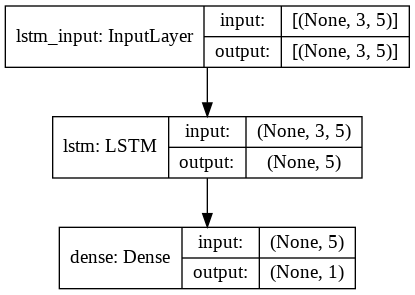

In [97]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png')


In [98]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])   
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
    

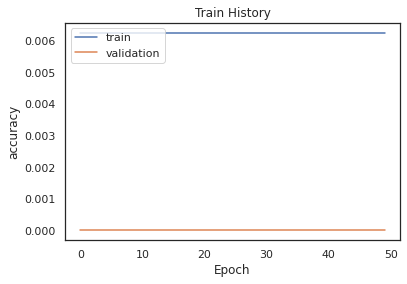

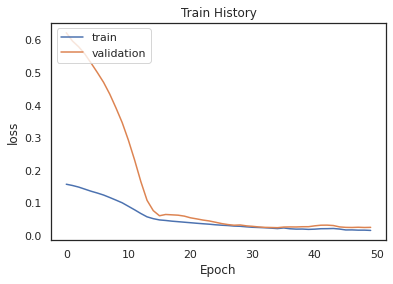

In [99]:
show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

In [100]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours* n_features,))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test MSE: 3642.230
Test RMSE: 60.351


In [101]:
# show the performance using confusion matrix
from sklearn.metrics import confusion_matrix
!pip install pycm
from pycm import *
print('CONFUSION MATRIX')
cm = ConfusionMatrix(actual_vector=inv_y, predict_vector=yhat)
print(cm)

CONFUSION MATRIX
Predict                    7237.33                    7260.82                    7276.7                     7276.99                    7286.959999999999          7300.219999999999          7301.65                    7312.98                    7313.47                    7322.460000000001          7322.97                    7323.96                    7330.39                    7330.84                    7340.290000000001          7343.78                    7344.969999999999          7349.990000000001          7350.68                    7356.01                    7357.979999999999          7359.41                    7365.919999999999          7368.86                    7385.51                    7388.59                    7390.669999999999          7394.889999999999          7396.599999999999          7399.97                    7404.89                    7406.09                    7408.48                    7409.92                    7410.329999999999          7412.560000

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


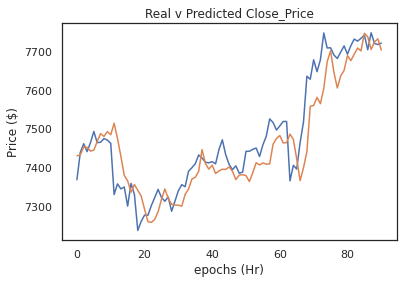

In [102]:
plt.title('Real v Predicted Close_Price')
plt.ylabel('Price ($)')
plt.xlabel('epochs (Hr)')
plt.plot(inv_y, label='Real')
plt.plot(inv_yhat, label='Predicted')
plt.show()

#**Normalization**

In [103]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist

# load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape the data
X_train = X_train.reshape(60000, 28*28).astype('float32')
X_test = X_test.reshape(10000, 28*28).astype('float32')
  
# normalize the data
X_train = X_train/255
X_test = X_test/255

# for keras classification, we need to use `to_categorical` to transform the label to appropriate format
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


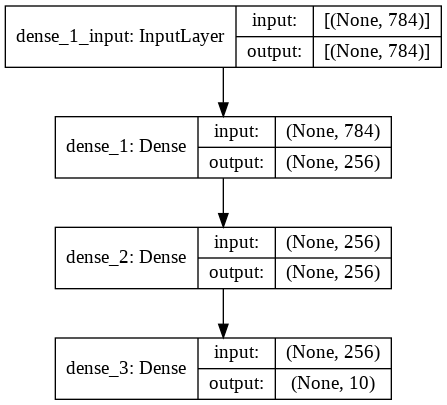

In [104]:
clf = Sequential()
clf.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
clf.add(Dense(units=256, 
                input_dim=64, 
                kernel_initializer='normal', 
                activation='relu'))
clf.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(clf.summary())

plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

Epoch 1/10
240/240 - 2s - loss: 0.3723 - accuracy: 0.8958 - val_loss: 0.1583 - val_accuracy: 0.9554
Epoch 2/10
240/240 - 1s - loss: 0.1341 - accuracy: 0.9597 - val_loss: 0.1227 - val_accuracy: 0.9640
Epoch 3/10
240/240 - 1s - loss: 0.0880 - accuracy: 0.9740 - val_loss: 0.0937 - val_accuracy: 0.9714
Epoch 4/10
240/240 - 1s - loss: 0.0618 - accuracy: 0.9821 - val_loss: 0.0889 - val_accuracy: 0.9718
Epoch 5/10
240/240 - 1s - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0867 - val_accuracy: 0.9736
Epoch 6/10
240/240 - 1s - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0806 - val_accuracy: 0.9767
Epoch 7/10
240/240 - 1s - loss: 0.0271 - accuracy: 0.9922 - val_loss: 0.0930 - val_accuracy: 0.9743
Epoch 8/10
240/240 - 1s - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.0835 - val_accuracy: 0.9763
Epoch 9/10
240/240 - 1s - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0900 - val_accuracy: 0.9771
Epoch 10/10
240/240 - 1s - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0838 - val_accuracy: 0.9778

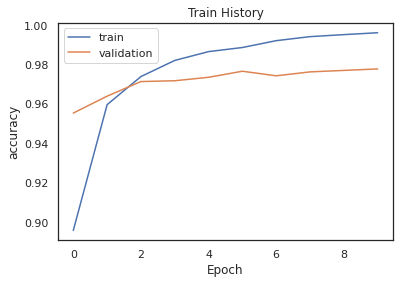

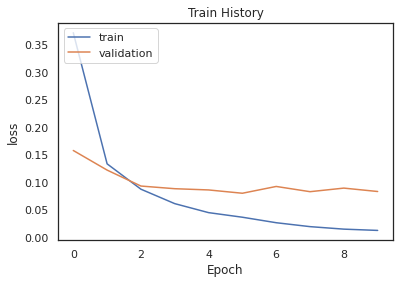

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9789
Accuracy of testing data = 97.9%


In [105]:
clf.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = clf.fit(x=X_train, y=y_train, 
                    validation_split=0.2,  
                    batch_size=200, 
                    epochs=10,
                    verbose=2)

show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

scores = clf.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

## Recurrent neural network (RNN) for sequential data / text

Here we just demonstrate two approaches of modeling the data:

using a RNN variant, long short term memory neural network (LSTM) for modeling,
combining CNN and LSTM for modeling (CNN for compressing the sequence information).
For the detailed differences of neural network architecture, please check the figure of neural networks below.

To make the modeling process simpler, we make all sequences (texts) the same length using zero padding

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           96000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5)                 760       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 96,766
Trainable params: 96,766
Non-trainable params: 0
_________________________________________________________________
None


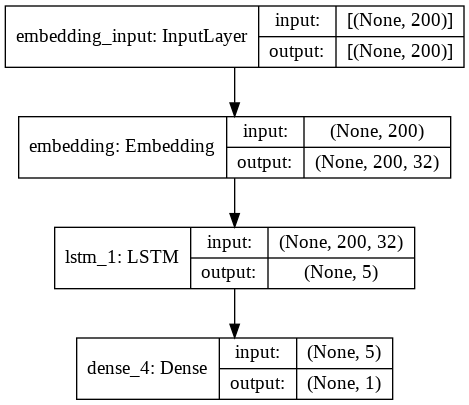

In [106]:

from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 3000
max_review_length = 200
embedding_vecor_length = 32


X_train = train_X.reshape((train_X.shape[0], n_hours, n_features))
X_test = test_X.reshape((test_X.shape[0], n_hours, n_features))

# LSTM
clf = Sequential()
clf.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
clf.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
clf.add(Dense(1, activation='sigmoid'))
clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(clf.summary())

plot_model(clf, to_file='clf.png', show_shapes=True, show_layer_names=True)
Image('clf.png')

# **Quantization**

In [107]:
# You don't need to edit any of this code.
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


class Net(nn.Module):
    def __init__(self, mnist=True):
      
        super(Net, self).__init__()
        if mnist:
          num_channels = 1
        else:
          num_channels = 3
          
        self.conv1 = nn.Conv2d(num_channels, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
        
      
    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)  
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [108]:
# You don't need to edit any of the code here.
def train(args, model_1, device, train_loader, optimizer, epoch):
    model_1.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_1(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
   
        if batch_idx % args["log_interval"] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(args, model_1, device, test_loader):
    model_1.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model_1(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [109]:
def main():
 
    batch_size = 64
    test_batch_size = 64
    epoch = 15
    lr = 0.01
    momentum = 0.5
    seed = 1
    log_interval = 500
    save_model = False
    no_cuda = False
    
    use_cuda = not no_cuda and torch.cuda.is_available()

    torch.manual_seed(seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    values = reframed.values
    n_train_hours = 200
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    # split into input and outputs
    train_X, train_y = train[:, :n_obs], train[:, -n_features]
    test_X, test_y = test[:, :n_obs], test[:, -n_features]
    
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))   
    
  
    model_1 = Net().to(device)
    optimizer = optim.SGD(model_1.parameters(), lr=lr, momentum=momentum)
    args = {}
    args["log_interval"] = log_interval
   
    #train(args, model, device, train_X, train_y, epochs,batch_size,test_X,test_y)
    #test(args, model, device, test_loader)
    model_1 = Sequential()
    model_1.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
    model_1.add(Dense(1))
    model_1.compile(loss='mae', optimizer='adam')
    history = model_1.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False,validation_split=0.2)

    if (save_model):
        torch.save(model_1.state_dict(),"mnist_cnn.pt")
    
    return model_1

model_1 = main()

Epoch 1/15
3/3 - 2s - loss: 0.3640 - val_loss: 0.8386
Epoch 2/15
3/3 - 0s - loss: 0.3475 - val_loss: 0.8199
Epoch 3/15
3/3 - 0s - loss: 0.3315 - val_loss: 0.8013
Epoch 4/15
3/3 - 0s - loss: 0.3156 - val_loss: 0.7829
Epoch 5/15
3/3 - 0s - loss: 0.2999 - val_loss: 0.7647
Epoch 6/15
3/3 - 0s - loss: 0.2844 - val_loss: 0.7466
Epoch 7/15
3/3 - 0s - loss: 0.2692 - val_loss: 0.7287
Epoch 8/15
3/3 - 0s - loss: 0.2544 - val_loss: 0.7110
Epoch 9/15
3/3 - 0s - loss: 0.2406 - val_loss: 0.6935
Epoch 10/15
3/3 - 0s - loss: 0.2274 - val_loss: 0.6763
Epoch 11/15
3/3 - 0s - loss: 0.2152 - val_loss: 0.6593
Epoch 12/15
3/3 - 0s - loss: 0.2040 - val_loss: 0.6427
Epoch 13/15
3/3 - 0s - loss: 0.1935 - val_loss: 0.6263
Epoch 14/15
3/3 - 0s - loss: 0.1837 - val_loss: 0.6101
Epoch 15/15
3/3 - 0s - loss: 0.1748 - val_loss: 0.5941


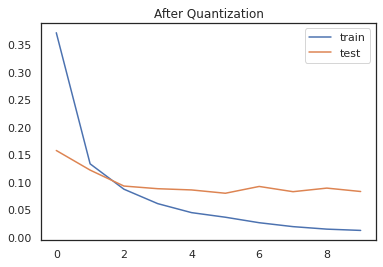

In [110]:
plt.title('After Quantization')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [111]:
from collections import namedtuple
from torch import tensor

QTensor = namedtuple('QTensor', ['tensor', 'scale', 'zero_point'])

def calcScaleZeroPoint(min_val, max_val, num_bits=None):
  pass
  # Return scale and zero point.
  # Use formulas 3 and 4 above.
  
  qmin = 0.
  qmax = 2.**num_bits - 1.

  scale_next = (max_val - min_val) / qmax

  initial_zero_point = qmin - min_val / scale_next
  
  zero_point_next = 0
  if initial_zero_point < qmin:
      zero_point_next = qmin
  elif initial_zero_point > qmax:
      zero_point_next = qmax
  else:
      zero_point_next = initial_zero_point

  zero_point_next = int(zero_point_next)

  return scale_next, zero_point_next

def quantize_tensor(float_x: tensor, num_bits: int):
  pass
  # Return a QTensor tuple, with the quantized tensor, scale and zero point as described above.
  # Use calcScaleZeroPoint and formula 6 above.
  # print(float_x.min().float())
  qmin = 0.
  qmax = 2.**num_bits - 1.
  scale, zero_point = calcScaleZeroPoint(float_x.min(), float_x.max(), num_bits)
  q_x = zero_point + float_x / scale
  q_x.clamp_(qmin, qmax).round_()
  q_x = q_x.round().float()
  
  return QTensor(tensor=q_x, scale=scale, zero_point=zero_point)


def dequantize_tensor(quantized_x: tensor, scale: float, zero_point: float , num_bits: int):
  pass
  return quantized_x.scale * (quantized_x.tensor.float() - quantized_x.zero_point)
  # Return float_tensor. 

In [112]:
# These are driver functions for your code. You do not need to edit.
def quantForward(model_1, input, num_bits):
  quantized_input = quantize_tensor(input, num_bits)
  output_1  = F.relu(model_1.conv1(quantized_input.tensor))
  output_2 = F.max_pool2d(quantize_tensor(output_1, num_bits).tensor, 2, 2)
  output_3 = F.relu(model_1.conv2(quantize_tensor(output_2, num_bits).tensor))
  output_4 = F.max_pool2d(quantize_tensor(output_3, num_bits).tensor, 2, 2)
  output_5 = output_4.view(-1, 4*4*50)
  output_6 = F.relu(model_1.fc1(quantize_tensor(output_5, num_bits).tensor))
  output_7 = model_1.fc2(quantize_tensor(output_6, num_bits).tensor)
  return F.log_softmax(quantize_tensor(output_7, num_bits).tensor, dim=1)

In [113]:
def testQuant(model_2, test_loader, quant=False, num_bits=None):
    device = 'cuda'
    model_2.eval()
    #model_1 = eval
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            if quant:
              output = quantForward(model_2, data, num_bits)
            else:
              output = model_2(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, correct

In [114]:
def main_1():
 
    batch_size = 64
    test_batch_size = 64
    epochs = 5
    lr = 0.01
    momentum = 0.5
    seed = 1
    log_interval = 500
    save_model = False
    no_cuda = False
    
    use_cuda = not no_cuda and torch.cuda.is_available()

    torch.manual_seed(seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True, **kwargs)
    
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True, **kwargs)
    
  
    model_2 = Net().to(device)
    optimizer = optim.SGD(model_2.parameters(), lr=lr, momentum=momentum)
    args = {}
    args["log_interval"] = log_interval
    for epoch in range(1, epochs + 1):
        train(args, model_2, device, train_loader, optimizer, epoch)
        test(args, model_2, device, test_loader)

    if (save_model):
        torch.save(model_2.state_dict(),"m_cnn.pt")
    
    return model_2

model_2 = main_1()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.292215
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.256712

Test set: Average loss: 0.1188, Accuracy: 9629/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.128099
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.056936

Test set: Average loss: 0.0751, Accuracy: 9749/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.058606
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.027661

Test set: Average loss: 0.0515, Accuracy: 9844/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.042059
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.019229

Test set: Average loss: 0.0455, Accuracy: 9841/10000 (98%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.025174
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.009529

Test set: Average loss: 0.0326, Accuracy: 9884/10000 (99%)



In [115]:
kwargs = {'num_workers': 1, 'pin_memory': True}
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False,download=True, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True, **kwargs)

In [116]:
accurate, loss = testQuant(model_2, test_loader, quant=True, num_bits=8)


Test set: Average loss: 0.1202, Accuracy: 9885/10000 (99%)



In [117]:
percentage = []
correctness = []
losses = []

for i in range(1, 10):
  
  accurate, loss = testQuant(model_2, test_loader, quant=True, num_bits=i)
  correctness.append(accurate)
  losses.append(loss)
  percentage.append((accurate/10000)*100)


Test set: Average loss: 2.2913, Accuracy: 1085/10000 (11%)


Test set: Average loss: 1.4461, Accuracy: 8617/10000 (86%)


Test set: Average loss: 0.6703, Accuracy: 9626/10000 (96%)


Test set: Average loss: 0.1605, Accuracy: 9849/10000 (98%)


Test set: Average loss: 0.0407, Accuracy: 9886/10000 (99%)


Test set: Average loss: 0.0371, Accuracy: 9886/10000 (99%)


Test set: Average loss: 0.0616, Accuracy: 9884/10000 (99%)


Test set: Average loss: 0.1213, Accuracy: 9885/10000 (99%)


Test set: Average loss: 0.2379, Accuracy: 9884/10000 (99%)



Text(0.5, 1.0, 'Accuracy Curve')

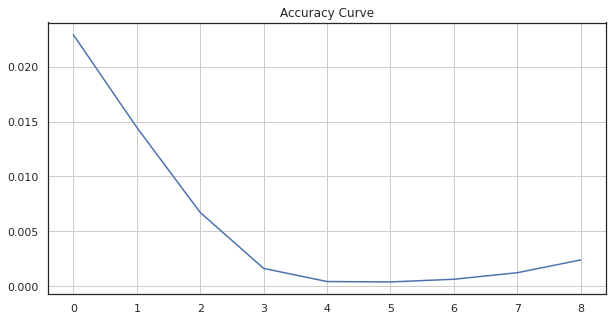

In [118]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.plot(percentage)
plt.grid(True)
plt.title('Accuracy Curve')

Text(0.5, 1.0, 'Loss Curve')

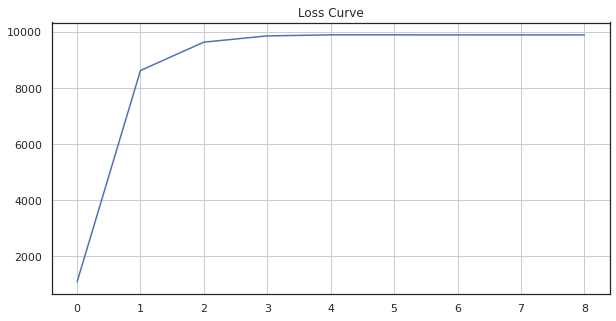

In [119]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.grid(True)
plt.title('Loss Curve')